In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from IPython.display import display
import copy
import seaborn as sns

from util import *


def plot_transformer_sperately():
    current_time = datetime.now()
    folder_name = current_time.strftime("%Y-%m-%d_%H-%M-%S")
    folder_path = os.path.join(os.getcwd(), folder_name)
    try:
        os.mkdir(folder_path)
        print(f"file '{folder_name}' created")
    except OSError as e:
        print(f"fail :{e}")
    sperately_data_for_not_in_train_in_one = read_data_for_transformer('spearately_for_not_in_train_in_one.txt')
    problem_set = [3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 20, 21]
    j=0
    for problem in problem_set:

        print(f'problem{problem}')

        epochs = []
        means = []
        stds = []
        means2 = []
        stds2 = []
        for i in range(100):
            piece = []
            piece.append(sperately_data_for_not_in_train_in_one[j * 100 + i][2])
            piece.append(sperately_data_for_not_in_train_in_one[700 + j * 100 + i][2])
            piece.append(sperately_data_for_not_in_train_in_one[1400 + j * 100 + i][2])
            piece.append(sperately_data_for_not_in_train_in_one[2100 + j * 100 + i][2])

            mean = np.mean(piece)
            var = np.var(piece)
            epochs.append(i)
            # epochs.append(i * 16)
            means.append(mean)
            stds.append(var)


        plt.figure(figsize=(10, 7))
        plot_each(plt, epochs, means, stds, f'problem{problem}',show_stds=True)
        plt.title(f'Mean and Std Over problem{problem}')
        plt.xlabel('Episode')
        plt.ylabel('Mean')
        plt.legend()

        plt.grid()
        # 显示图表
        plt.show()
        #plt.savefig(f'{folder_name}\problem{problem}.png')
        print()
        j = j + 1



In [ ]:
train_in_one_data = read_data_for_transformer('train_in_one_seed1_5.txt')
sperately_data = read_data_for_transformer('spearately_for_train_in_one_problem_seed1_5.txt')

sperately_data_for_not_in_train_in_one = read_data_for_transformer('spearately_for_not_in_train_in_one.txt')

current_time = datetime.now()
folder_name = current_time.strftime("%Y-%m-%d_%H-%M-%S")


In [ ]:
# draw sperate
j=0 # begin from 1, jump problem1
sacle = False
problem_set = [2,11,18,19,22,23]
ground_truth = [-100,-100,-5,-220,-100,0]
problem_set = [3,4,5,6,7,8,9,10,12,13,14,15,16,17,20,21]
problem_num = len(problem_set)
data = {}
for problem in problem_set:

    print(f'problem{problem}')

    epochs = []
    means = []
    stds = []
    means2 = []
    stds2 = []
    max = -1000000
    min = 1000000000
    for i in range(100):
        piece = []
        piece.append(sperately_data_for_not_in_train_in_one[j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100+ j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100*2 + j*100 + i][2])
        piece.append(sperately_data_for_not_in_train_in_one[problem_num*100*3 + j*100 + i][2])

        mean = np.mean(piece)
        var = np.std(piece)
        #epochs.append(i)
        epochs.append(i * 16)
        #means.append(mean)
        means.append(-mean)
        stds.append(var)
        if max<-mean:
            max = -mean
        if min>-mean:
            min = -mean
        
    for x in range(100):
        if sacle:
            means[x] = (means[x]-min)/(max-min)*1000

            piece.append((sperately_data_for_not_in_train_in_one[j*100 + x][2]-min)/(max-min)*1000)
            piece.append((sperately_data_for_not_in_train_in_one[problem_num*100+ j*100 + x][2]-min)/(max-min)*1000)
            piece.append((sperately_data_for_not_in_train_in_one[problem_num*100*2 + j*100 + x][2]-min)/(max-min)*1000)
            piece.append((sperately_data_for_not_in_train_in_one[problem_num*100*3 + j*100 + x][2]-min)/(max-min)*1000)
            # if means2[x]<0:
            #    means2[x] = -np.log(-means2[x])
            var = np.std(piece)
            stds[x] = var
        pass

    data.update({f'Means_{problem}': means, f'Vars_{problem}': stds})
    #data = {'Epoch': epochs, f'Means{problem}': means,f'S_Means{problem}': means2, 'Vars{problem}': stds,'S_Vars{problem}': stds2}
    j = j + 1
data.update({'Epoch': epochs})
# add problem 1 
i=0
means = []
stds = []
for i in range(100):
    piece = []
    piece.append(train_in_one_data[i][2])
    piece.append(train_in_one_data[700+ i][2])
    piece.append(train_in_one_data[1400 + i][2])
    piece.append(train_in_one_data[2100 + i][2])

    mean = np.mean(piece)
    var = np.std(piece)
    means.append(-mean)
    stds.append(var)    

problem_set.append(1)
data.update({f'Means_1': means, f'Vars_1': stds})
df = pd.DataFrame(data)
display(df)


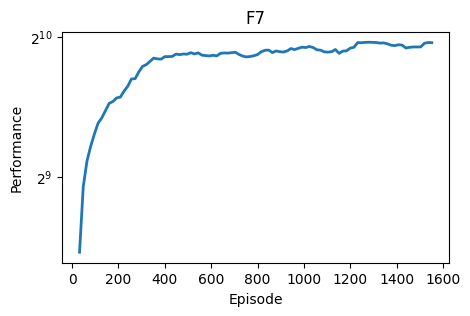


In [ ]:
from matplotlib.ticker import ScalarFormatter
_new_df = copy.deepcopy(df)
new_df = _new_df.rolling(window=5, center=False).mean() 
display(new_df)
show_std = True
for problem in problem_set:
    plt.figure(figsize=(5, 3))
    plot_each(plt, new_df['Epoch'], new_df[f'Means_{problem}'], new_df[f'Vars_{problem}'], f's_problem{problem}',show_stds=show_std)

    plt.title(f'F{problem}')
    plt.xlabel('Episode')
    plt.ylabel('Performance')

    if show_std:
        plt.savefig(f'single_problem_with_std\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')
    else:
        plt.savefig(f'single_problem\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')

In [ ]:
# draw continue
j=1 # begin from 1, jump problem1

problem_set = [2,11,18,19,22,23]
problem_num = 7 # continual problems
ground_truth = [-100,-100,-5,-220,-100,0]
#problem_set = [3,4,5,6,7,8,9,10,12,13,14,15,16,17,20,21]
data = {}
for problem in problem_set:

    print(f'problem{problem}')

    epochs = []
    means = []
    stds = []
    means2 = []
    stds2 = []
    max = -1000000
    min = 1000000000
    for i in range(100):
        piece = []
        piece.append(train_in_one_data[j*100 + i][2])
        piece.append(train_in_one_data[problem_num*100+ j*100 + i][2])
        piece.append(train_in_one_data[problem_num*100*2 + j*100 + i][2])
        piece.append(train_in_one_data[problem_num*100*3 + j*100 + i][2])

        mean = np.mean(piece)
        var = np.var(piece)
        epochs.append(i*16)
        #epochs.append(i * 16)
        #means.append(mean)
        means.append(-mean)
        stds.append(var)

        piece = []
        piece.append(sperately_data[(j-1)*100 + i][2])
        piece.append(sperately_data[700+ (j-1)*100 + i][2])
        piece.append(sperately_data[1400 + (j-1)*100 + i][2])
        piece.append(sperately_data[2100 + (j-1)*100 + i][2])

        mean2 = np.mean(piece)
        var2 = np.var(piece)
        #means2.append(mean2)
        means2.append(-mean2)
        stds2.append(var2)

        if max<-mean: max = -mean
        if max<-mean2:max=-mean2
        if min>-mean: min = -mean
        if min>-mean2:min=-mean2

    data.update({f'Means_{problem}': means,f'S_Means_{problem}': means2, f'Vars_{problem}': stds,f'S_Vars_{problem}': stds2})
    j = j + 1
data.update({'Epoch': epochs})
df = pd.DataFrame(data)
display(df)

In [ ]:
# draw sperate in continue learn

_new_df = copy.deepcopy(df)
new_df = _new_df.rolling(window=5, center=False).mean() 
display(new_df)

for problem in problem_set:
    plt.figure(figsize=(5, 3))
    plot_each(plt, new_df['Epoch'], new_df[f'Means_{problem}'], new_df[f'Vars_{problem}'], f's_problem{problem}',show_stds=False)

    plt.title(f'F{problem}')
    plt.xlabel('Episode')
    plt.ylabel('Performance')

    plt.savefig(f'single_problem_in_continue\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')



Draw continue and single, Pig.5.

In [ ]:

from matplotlib.ticker import FuncFormatter
def custom_log_scale(x, pos):
    threshold = 0 
    if x < threshold:
        log_value =  -np.log(-x) 
    else:
        log_value =  x 
    return "{:.1f}".format(log_value)

for problem in problem_set:
    plt.figure(figsize=(5, 3))
    g = sns.lineplot(data=new_df, x='Epoch', y=f'S_Means_{problem}',label = 'one-off')
    g = sns.lineplot(data=new_df, x='Epoch', y=f'Means_{problem}',label = 'continual')

    plt.title(f'F{problem}')
    plt.xlabel('Episode')
    plt.ylabel('Performance')
    plt.legend()

    plt.savefig(f'continue_problem\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')

Below draw small picture in above picture, Pic.5.

In [ ]:
#draw small picture

problem_set = [11,18,19,22]
slim = {11:[50,70],18:[2.5,4],19:[200,215]}
for problem in problem_set:
    
    pig = plt.figure(figsize=(5, 3))
    
    ax1 = pig.add_axes([0.1,0.1,0.8,0.8])
    if problem != 22:
        if problem == 19:
            ax2 = pig.add_axes([0.5,0.36,0.3,0.3])
        else:
            ax2 = pig.add_axes([0.5,0.4,0.3,0.3])
    
    plot_each(ax1, new_df['Epoch'], new_df[f'Means_{problem}'], None,  'continual')
    plot_each(ax1, new_df['Epoch'], new_df[f'S_Means_{problem}'], None,  'one-off')
    if problem != 22:
        plot_each(ax2, new_df['Epoch'], new_df[f'Means_{problem}'], None,  'continual')
    
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Performance')
    ax1.set_title(f'F{problem}')
    ax1.legend()
    if problem != 22:
        ax2.set_ylim(slim[problem]) 
        ax2.set_xticks([1600]) 

    plt.savefig(f'continue_problem\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')

In [ ]:
pkls=['performance\problem21_04_24_18_57.pkl','performance\problem21_04_24_20_39.pkl','performance\problem21_04_24_22_14.pkl']
datas = read_from_pkl(pkls)
#print(len(datas))
total = {}
total_mid = []
total_max = []
for data in datas:
    # 100 epoch
    mid=[]
    max= []
    for i in range(100):
        #one epoch: 16 alg
        alg_means=[]
        for j in range(16):
            alg_means.append(data[i][j].mean())
        alg_means_np = np.array(alg_means)
        mid.append(np.median(alg_means_np))
        max.append(np.max(alg_means_np))
    total_mid.append(mid)
    total_max.append(max)

# make mean between seeds
total_mid_np = np.mean(np.array(total_mid),axis =0)
total_max_np = np.mean(np.array(total_max),axis =0)
total_mid_std_np = np.var(np.array(total_mid),axis =0)
total_max_std_np = np.var(np.array(total_max),axis =0)


epochs = [num for num in range(100)]
data = {}
data.update({f'mid': total_mid_np,f'max': total_max_np,'mid_std':total_mid_std_np,'max_std':total_max_std_np,'epochs':epochs})
     
df = pd.DataFrame(data)
display(df)



In [ ]:
plt.figure(figsize=(10, 7))

plot_each(plt, epochs, total_mid_np, total_mid_std_np, f'problem',show_stds=False)

plt.title(f'Mean and Std Over problem')
plt.xlabel('Episode')
plt.ylabel('Mean')
plt.legend()

plt.show()
#plt.savefig(f'{folder_name}\problem{problem}.png')